# Setup phase

In [4]:
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [5]:
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn

# preprocessing of the data

## Loading the data

In [3]:
import numpy as np
import pandas as pd

dataframe = pd.read_csv('anonymized-surveys-numbers.csv')
dataframe.head()

,Id,starting_time,ending_time,language,compilationLanguage,everHeardAboutTarots,tarotKnowledge,tarotUsageFrequency,tarotUseCases,tarotUsageTarget,...,LLM_decisionSupportUsageFrequency,LLM_everGivenUsefulInfoAsDecisionSupport,LLM_decisionSupportTarget,LLM_everChangedDecisionAsDecisionSupport,LLM_trustAgainstOtherInfo,gender,education,nazionalità,statoDiResidenza,cittaDiResidenza
0,1,7/28/2024 11:10,7/28/2024 11:12,Italiano,Italiano,Si,4,2,Per divertimento e passare tempo con gli amici;,"Li utilizzo per gli altri, li leggo io",...,2.0,2.0,Decisioni di studio/educazione;Decisioni lavor...,Si,Del tuo intuito,Maschile,Laurea magistrale,Italiana,Italia,Caltanissetta
1,2,7/29/2024 11:10,7/29/2024 11:12,Italiano,Italiano,Si,3,2,Per divertimento e passare tempo con gli amici;,"Li utilizzo per gli altri, li leggo io",...,2.0,2.0,Decisioni di studio/educazione;Decisioni lavor...,Si,Del tuo intuito,Femminile,Master II livello,Italiana,Italia,Catania
2,3,7/29/2024 11:10,7/29/2024 11:14,Italiano,Italiano,Si,2,2,Per comprendere meglio cio che accade nella mi...,"Li utilizzo per me stesso, li leggo io",...,1.0,0.0,Non chiedo consiglio per prendere decisioni;,No,Del tuo intuito,Femminile,Laurea magistrale,Italiana,Italia,Roma
3,4,7/29/2024 11:18,7/29/2024 11:23,Italiano,Italiano,Si,1,1,Per divertimento e passare tempo con gli amici;,"Li utilizzo per me stesso, me li faccio legger...",...,2.0,2.0,Decisioni di studio/educazione;Decisioni lavor...,No,Del tuo intuito,Maschile,Laurea magistrale,Italiana,Italia,Mascalucia
4,5,7/29/2024 11:27,7/29/2024 11:32,English (United Kingdom)?,Italiano,Si,1,0,Per divertimento e passare tempo con gli amici;,"Li utilizzo per me stesso, li leggo io",...,1.0,1.0,Decisioni di studio/educazione;,No,Del tuo intuito,Maschile,Master I livello,Italiana,Italia,Aci Catena


In [4]:
dataframe.columns

Index(['Id', 'starting_time', 'ending_time', 'language', 'compilationLanguage',
       'everHeardAboutTarots', 'tarotKnowledge', 'tarotUsageFrequency',
       'tarotUseCases', 'tarotUsageTarget', 'tarotConsultation', 'tarotTrust',
       'tarotFuturePredictionTrust', 'tarotDecisionSupport',
       'tarotDecisionSupportFrequency', 'tarotSubjects', 'tarotInfluence',
       'tarotDecisionSupportTrust', 'tarotModifyDecision',
       'tarotImportanceOverOtherSources', 'tarotContradictionFrequency',
       'tarotTrustMore', 'randomNumber', 'LLM_knowledge',
       'LLM_knowledgeQuantified', 'LLM_use', 'LLM_usageFrequency',
       'LLM_usageTarget', 'LLM_utility', 'LLM_trust',
       'LLM_trustAgainstClassicalInfo', 'LLM_asDecisionSupport',
       'LLM_decisionSupportUsageFrequency',
       'LLM_everGivenUsefulInfoAsDecisionSupport', 'LLM_decisionSupportTarget',
       'LLM_everChangedDecisionAsDecisionSupport', 'LLM_trustAgainstOtherInfo',
       'gender', 'education', 'nazionalità', 'statoDi

In [5]:
relevant_data = dataframe.drop(columns=['Id','starting_time','ending_time','language','randomNumber'])

real_data = relevant_data

# convert the columns with "Si" or "No" to 1 or 0
real_data = real_data.replace('Si', 1)
real_data = real_data.replace('No', 0)

# convert the rows with Na to 0
real_data = real_data.fillna(0)

# drop the columns that have strings
real_data = real_data.drop(columns=['everHeardAboutTarots','compilationLanguage', 'tarotUsageTarget', 'tarotUseCases', 'tarotSubjects', 'tarotTrustMore', 'LLM_trustAgainstOtherInfo', 'LLM_usageTarget', 'LLM_decisionSupportTarget', 'gender', 'education', 'nazionalità', 'statoDiResidenza','cittaDiResidenza'])

/tmp/ipykernel_7413/4011238546.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  real_data = real_data.replace('Si', 1)
/tmp/ipykernel_7413/4011238546.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  real_data = real_data.replace('No', 0)


## Key Research Questions and Hypotheses
Is there a relationship between belief and trust in tarot and belief and trust in LLM?
The hypothesis to negate or confirm are:
- Null hypothesis(H0): There is no relationship between belief and trust in tarot and belief and trust in LLM.
- Alternative Hypothesis (H1): There is a significant relationship between belief in tarot and belief in AI LLMs.

### 3. **Correlation and Association Tests:**

In [13]:
# spearman correlation matrix
correlation_matrix_spearman = real_data.corr(method='spearman')
# pearson correlation matrix
correlation_matrix_pearson = real_data.corr(method='pearson')


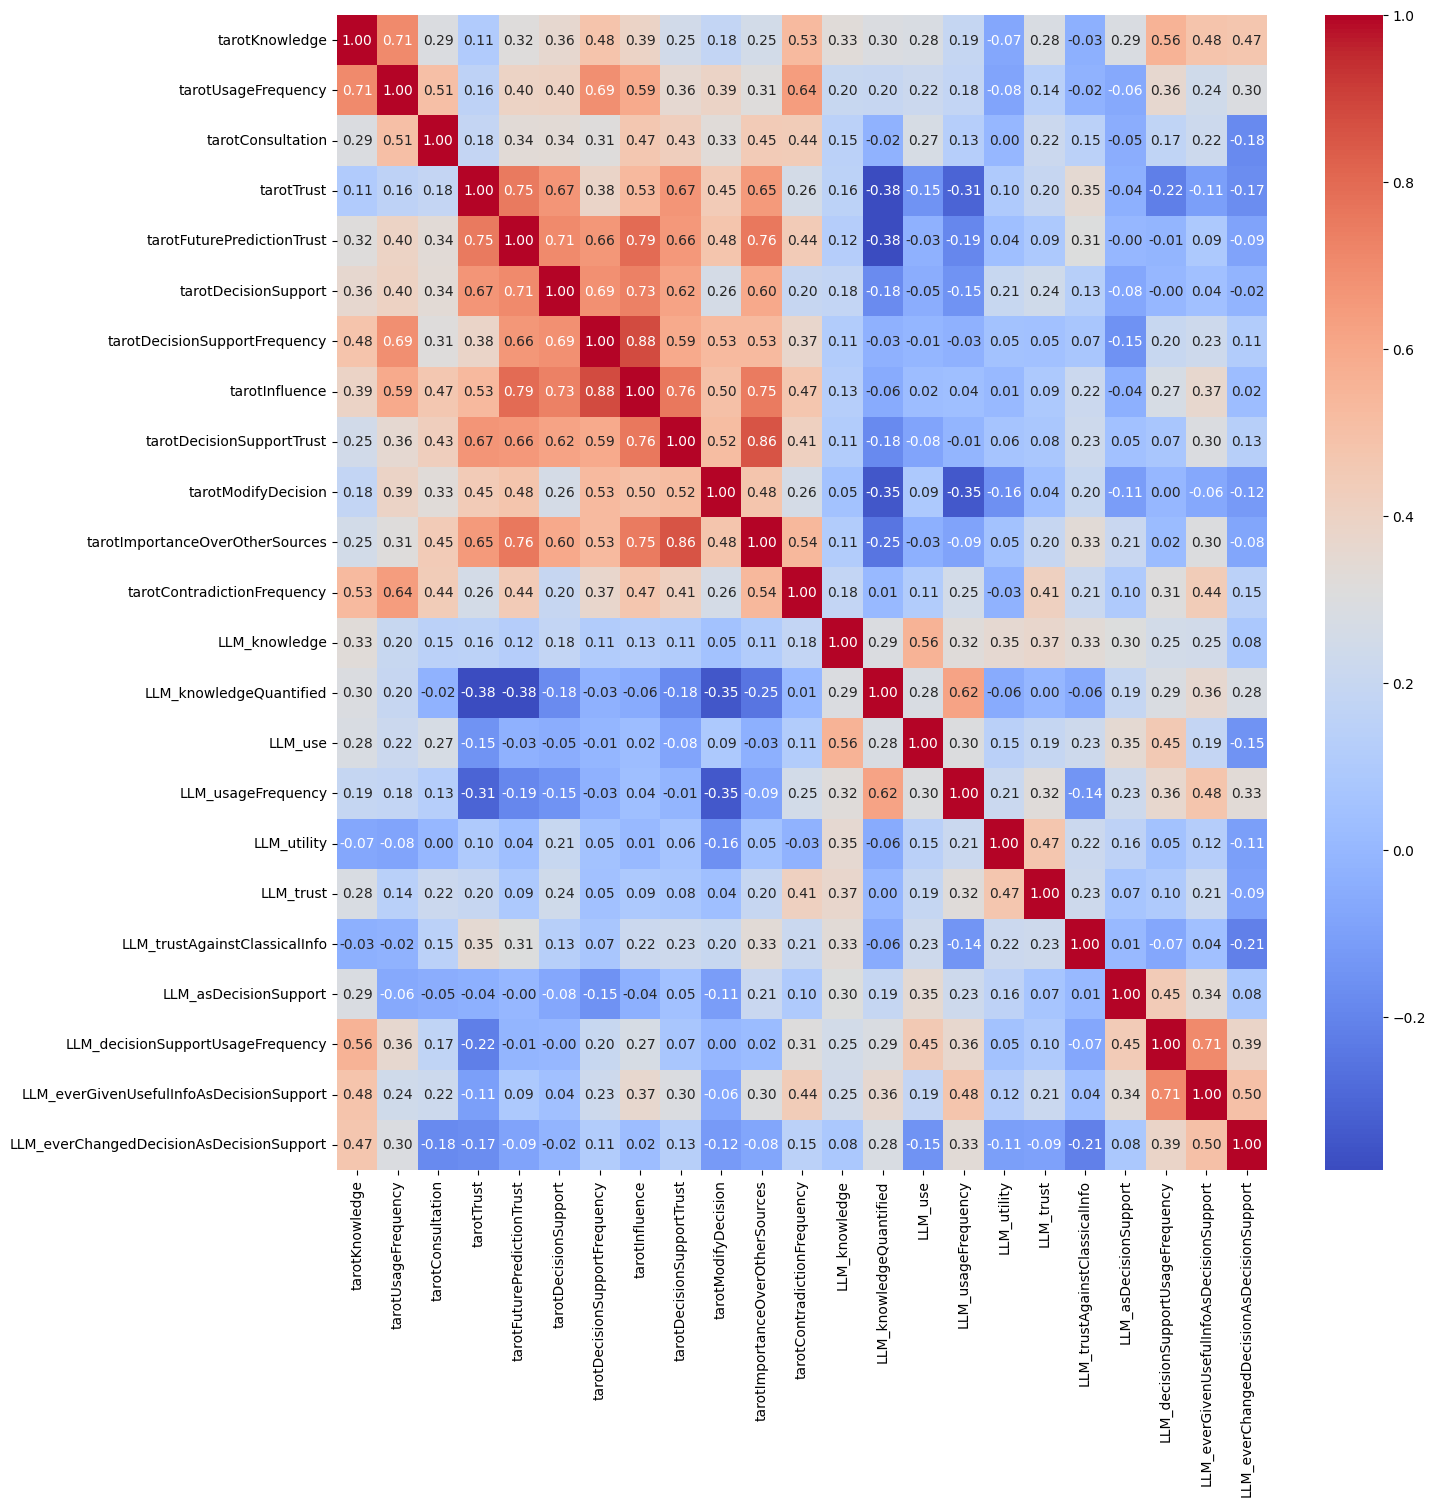

In [14]:
# show correlation matrices in heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_spearman, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

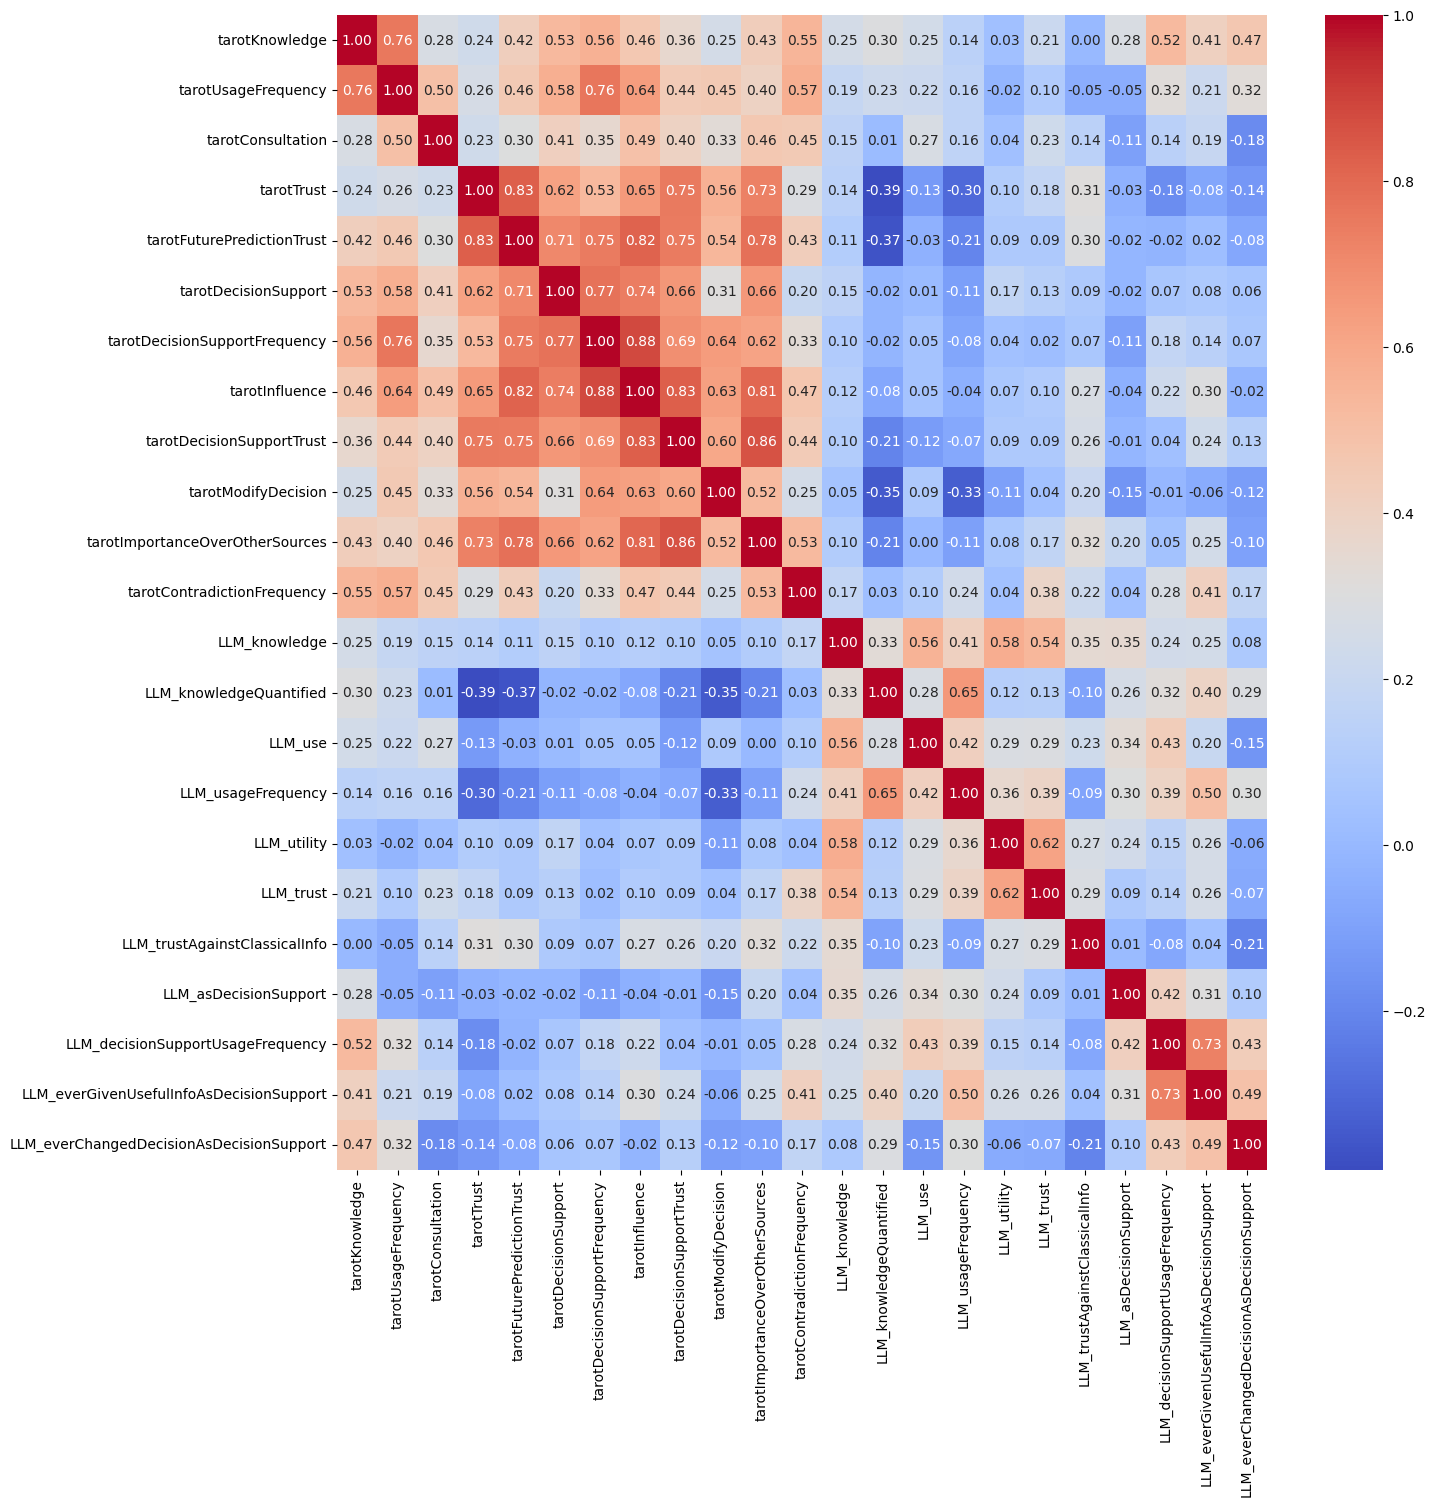

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix_pearson, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**Chi-Square Test for Independence:**
   

In [19]:
# chi-square test for indipendence
from scipy import stats

crosstab_usageFrequency_vs_decisionSupportUsageFrequency = pd.crosstab(real_data['LLM_usageFrequency'],real_data['LLM_decisionSupportUsageFrequency'])
stats.chi2_contingency(crosstab_usageFrequency_vs_decisionSupportUsageFrequency)

Chi2ContingencyResult(statistic=np.float64(10.630102040816327), pvalue=np.float64(0.560856321955135), dof=12, expected_freq=array([[0.53333333, 0.93333333, 0.46666667, 0.06666667],
       [1.33333333, 2.33333333, 1.16666667, 0.16666667],
       [1.86666667, 3.26666667, 1.63333333, 0.23333333],
       [3.73333333, 6.53333333, 3.26666667, 0.46666667],
       [0.53333333, 0.93333333, 0.46666667, 0.06666667]]))

### 4. **Cluster Analysis:**
   Cluster analysis to group respondents into different profiles based on their attitudes toward tarot and AI LLMs. For example:
   - **Cluster 1:** High belief in tarot, low belief in AI LLMs.
   - **Cluster 2:** High belief in both tarot and AI LLMs.
   - **Cluster 3:** Low belief in both tarot and AI LLMs.


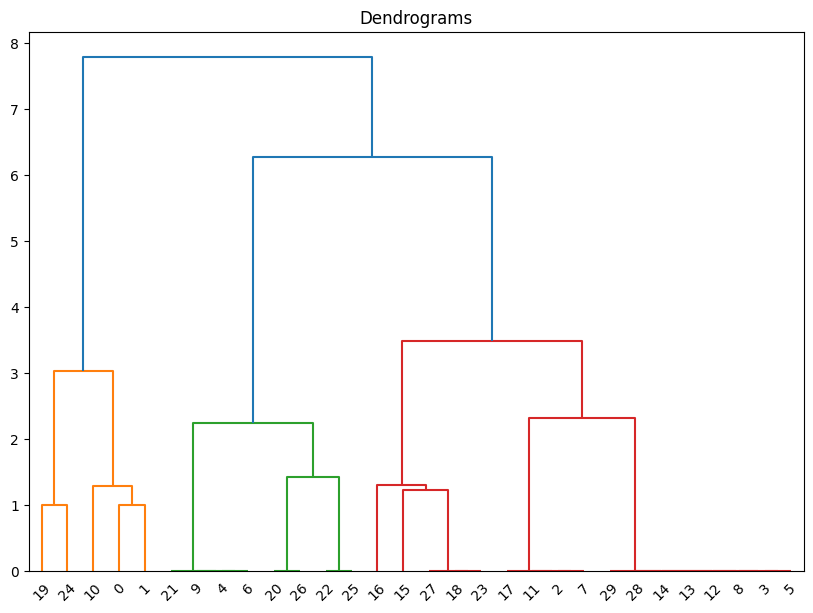

In [8]:
# cluster analysis with different features
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

real_data_subset = real_data[['LLM_knowledgeQuantified' , 'tarotKnowledge']]
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(real_data_subset, method='ward'))

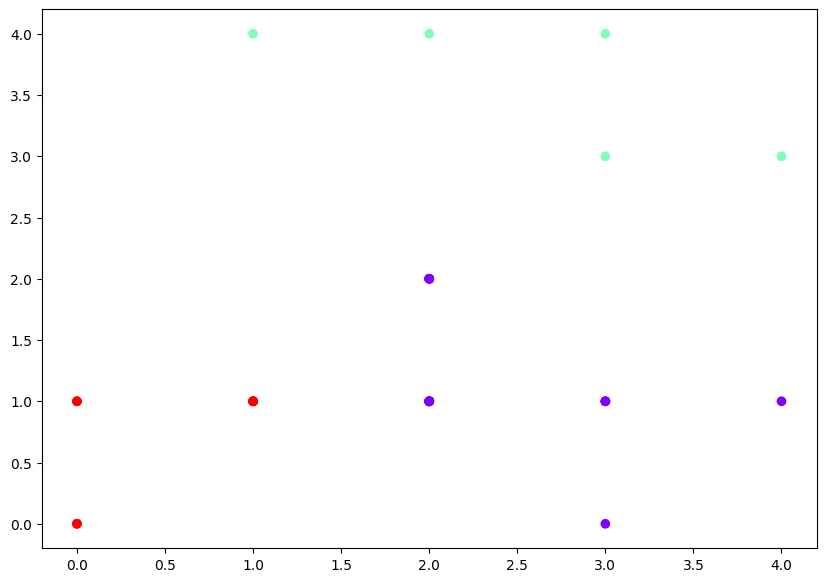

In [13]:
# plot 2d data with colors based on the cluster
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(real_data_subset)

plt.figure(figsize=(10, 7))
plt.scatter(real_data_subset['LLM_knowledgeQuantified'], real_data_subset['tarotKnowledge'], c=cluster.labels_, cmap='rainbow')

# TODO
Do a better cluster analysis using more features


### 5. **Factor Analysis:**
   If you have multiple questions related to the same underlying construct (e.g., trust in tarot, frequency of use, reliance on tarot for decision-making), factor analysis can help identify latent variables. This could reveal dimensions such as "belief in divination" or "reliance on external tools for decision-making" that could correlate with attitudes toward AI LLMs.


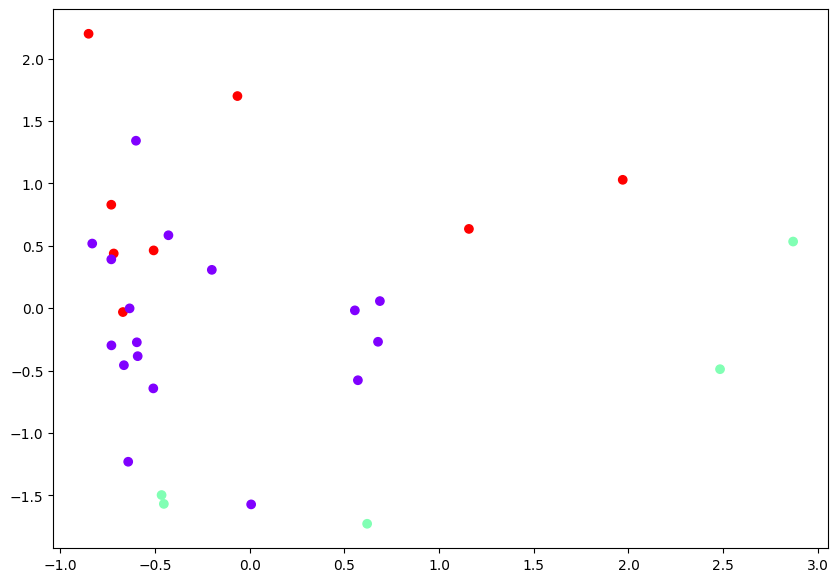

In [14]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa.fit(real_data)
real_data_transformed = fa.transform(real_data)

plt.figure(figsize=(10, 7))
plt.scatter(real_data_transformed[:,0], real_data_transformed[:,1], c=cluster.labels_, cmap='rainbow')
